**Logistic regression for binary classification**

In [58]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [57]:
#Loading the Data
dataset = pd.read_csv("churn_data.csv")

**Analyze the Data**

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,NaN,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,NaN,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,NaN,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,NaN,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.describe()

,SeniorCitizen,Unnamed: 13,tenure,MonthlyCharges
count,7042.000000,0.0,7042.000000,7042.000000
mean,0.162170,NaN,32.366373,64.755886
std,0.368633,NaN,24.557955,30.088238
min,0.000000,NaN,0.000000,18.250000
25%,0.000000,NaN,9.000000,35.500000
50%,0.000000,NaN,29.000000,70.350000
75%,0.000000,NaN,55.000000,89.850000
max,1.000000,NaN,72.000000,118.750000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  Unnamed: 13       0 non-null      float64
 14  tenure            7042 non-null   int64  
 15  PhoneService      7042 non-null   object 
 16  Contract          7042 non-null   object 


**Data Preprocessing**

In [ ]:
dataset["Churn"].value_counts()

No     5173
Yes    1869
Name: Churn, dtype: int64

In [ ]:
x = dataset["MonthlyCharges"]
y = dataset["Churn"]

In [ ]:
x.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7037    False
7038    False
7039    False
7040    False
7041    False
Name: MonthlyCharges, Length: 7042, dtype: bool

In [ ]:
y.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7037    False
7038    False
7039    False
7040    False
7041    False
Name: Churn, Length: 7042, dtype: bool

In [ ]:
x.values.reshape(-1, 1)
y.values.reshape(-1, 1)

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['No'],
       ['Yes']], dtype=object)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

Scaling the Data

In [30]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [31]:
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)

#X_test = scaler.fit(X_test)

**Creating Model**

In [32]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
y_test

2822    Yes
1944    Yes
1475     No
5247    Yes
2667     No
       ... 
5948     No
3111    Yes
2100     No
1731    Yes
1363     No
Name: Churn, Length: 2324, dtype: object

**Evaluating the model**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[1682,    0],
       [ 642,    0]])

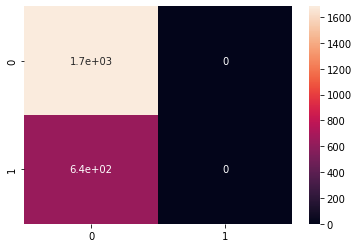

In [53]:
sns.heatmap(cm, annot=True)

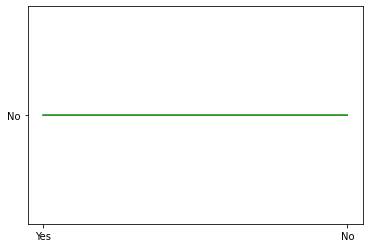

In [56]:
plt.plot(y_test, y_pred, color="green")

plt.show()

In [52]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy:  72.37521514629948
